In [1]:
import os
import numpy as np
import pandas as pd
from mpl_toolkits.basemap import Basemap
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
from ipywidgets import interactive
%matplotlib inline

In [2]:
datapath = os.path.join("..", "data", "crimes.zip")
columns = ["ID", "Date", "Block", "Primary Type", "Latitude", "Longitude", "District", "Ward", "Community Area"]
fulldata = pd.read_csv(datapath, usecols=columns)

In [3]:
fulldata["Date"] = pd.to_datetime(fulldata["Date"],
                                  format='%m/%d/%Y',
                                  exact=False)
fulldata = fulldata.set_index("Date")

If the mpl_toolkits is broken again try:
```bash
sudo apt-get install libgeos-3.5.0
sudo apt-get install libgeos-dev
pip3 install https://github.com/matplotlib/basemap/archive/master.zip --user
```

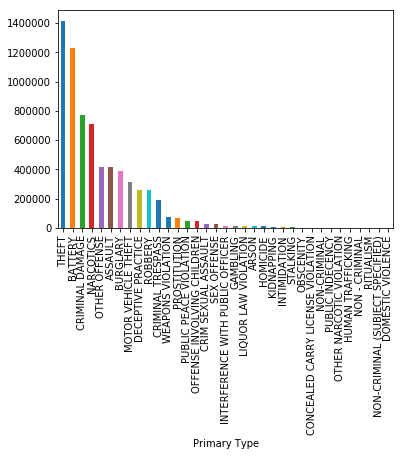

In [4]:
primary_type_counts = fulldata.groupby("Primary Type").ID.count().sort_values(ascending=False)
primary_type_counts.plot(kind="bar")

In [5]:
primary_types = ['TOTAL'] + primary_type_counts.index.tolist()

In [6]:
def crime_viewer(crime, year):
    crime_type = crime.lower().replace(" ", "_")
    png_title = "crime_" + crime_type + "_" + str(year) + ".png"
    plt.figure(figsize=(10, 5))
    img = mpimg.imread(os.path.join("maps", png_title))
    plt.imshow(img)

interactive(crime_viewer, crime = primary_types, year=(2001, 2017, 1))

interactive(children=(Dropdown(description='crime', options=('TOTAL', 'THEFT', 'BATTERY', 'CRIMINAL DAMAGE', '…

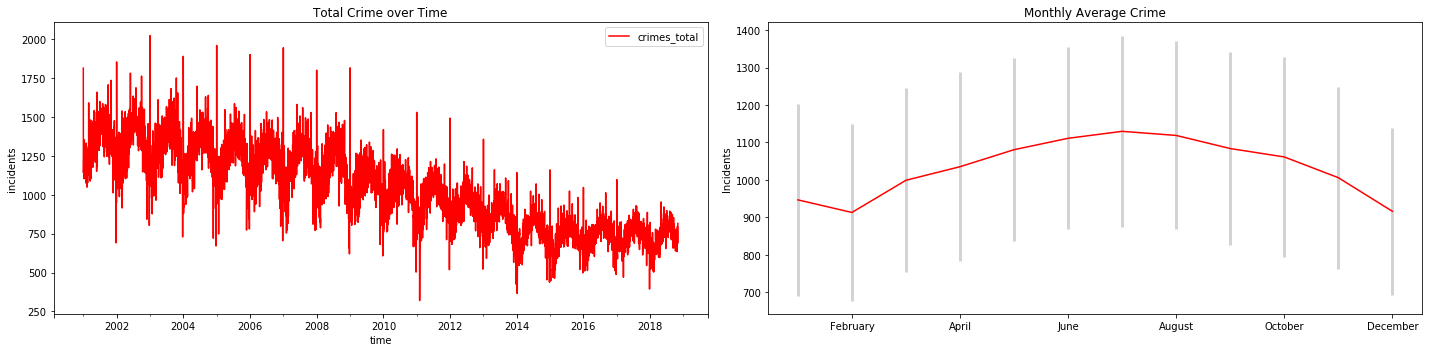

In [82]:
seriespath = os.path.join("..", "data", "crime_total.csv")
data = pd.read_csv(seriespath, index_col=["date"], parse_dates=True)

fig, ax = plt.subplots(ncols=2, figsize=(20, 5), sharey=False)
data.plot(c="red", ax=ax[0], title="Total Crime over Time")
ax[0].set_ylabel("incidents")
ax[0].set_xlabel("time")

averages = data.groupby(data.index.month).mean()
averages["stdev"] = data.groupby(data.index.month).std()

ax[1].errorbar(averages.index, averages.crimes_total, yerr=averages.stdev,
               color="red", ecolor='lightgray', elinewidth=3, capsize=0)
ax[1].set_xticks(range(2, 13, 2))
ax[1].set_xticklabels(["February", "April", "June", "August", "October", "December"])
ax[1].set_ylabel("Incidents")
ax[1].set_title("Monthly Average Crime")

plotpath = os.path.join("..", "analysis", "figures", "total_crime_over_time.png")
fig.tight_layout()
fig.savefig(plotpath)

Text(0, 0.5, 'Incidents')

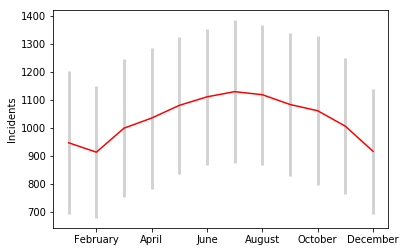

In [72]:

fig, ax = plt.subplots()


In [24]:
data.index

Index(['2001-01-01', '2001-01-02', '2001-01-03', '2001-01-04', '2001-01-05',
       '2001-01-06', '2001-01-07', '2001-01-08', '2001-01-09', '2001-01-10',
       ...
       '2018-10-22', '2018-10-23', '2018-10-24', '2018-10-25', '2018-10-26',
       '2018-10-27', '2018-10-28', '2018-10-29', '2018-10-30', '2018-10-31'],
      dtype='object', name='date', length=6513)

In [41]:
averages

,crimes_total,stdev
date,,
1,946.650538,256.410958
2,913.043307,235.232149
3,998.915771,246.127651
4,1035.155556,252.147257
5,1080.584229,244.233456
6,1111.012963,242.855710
7,1129.627240,255.472985
8,1118.668459,251.072413
9,1083.675926,257.188431
